#### Este primeiro método de resolução, consiste na utilização de conceitos de NLP, e vetorização para palavras para resolução. Por isso, conta com utilização de bibliotecas prontas. Foi utilizado, também, o conceito de similaridade de cossenos para construção das relações entre palavras.

### Importação das Bibliotecas:

In [82]:
import numpy as np
from matplotlib import pyplot as plt
import re
from nltk.corpus import stopwords

import keras
from keras.layers import Dense, Activation, Input, Dropout
from keras.models import Model

### Importação dos dados:

In [83]:
f = open('Base Text - Matrix Representation.txt')                               # Abre o arquivo

raw_data = f.read()                                                             # Le o arquivo
f.close()                                                                       # Fecha o arquivo

### Visualizando os dados:

In [84]:
raw_data

'Fusce risus ex, posuere at ante at, condimentum vestibulum nunc. Proin dapibus egestas neque, a tempor odio pharetra eget. Nullam tempus felis eu consectetur tincidunt. Integer fermentum eu quam vitae tempus. Vivamus volutpat ut dui vitae sollicitudin. Donec ornare dolor a vestibulum pharetra. Mauris eget dui sapien. Mauris lobortis feugiat neque, nec congue leo viverra semper. In vel mauris nunc. Aenean scelerisque arcu a varius tempor. Proin quis nisi et mi dictum tempor. Pellentesque mattis risus metus, id luctus orci ultrices ac. Praesent bibendum lectus a nisl mollis, eu suscipit eros pretium.\nPhasellus vitae elit efficitur, varius felis id, vulputate neque. Praesent dictum nunc in velit lobortis tempus. Duis pulvinar ut urna eget volutpat. In hac habitasse platea dictumst. Aenean eros libero, ultrices eu dolor id, ultrices bibendum mauris. Nunc quis nunc feugiat, dapibus sem eget, pretium orci. Mauris mauris felis, pulvinar nec dapibus in, laoreet ac nibh. Pellentesque habitant

### Pre-processing dos dados --> .lower() + re.sub() [subtituir expressões regulares] + Removendo as Stopwords [palavras não relevantes]

In [85]:
data_processed = raw_data.lower()
data_processed = re.sub('[^A-Za-z]+', ' ', data_processed)
data_processed = data_processed.split()

data_processed.remove('at')
data_processed.remove('a')
data_processed = np.array(data_processed)
data_processed.shape

(348,)

### Acrescendo dados únicos ao vocabulário:

In [86]:
vocabulary, counts = np.unique(data_processed, return_counts=True)

vocabulary.shape, counts.shape

((142,), (142,))

### Imprementando vetor encoder para pré-processamento das features categóricas em um modelo ML:

In [87]:
def get_one_hot_vector(word):

    vec = np.zeros((vocabulary.shape[0], ))

    index = (vocabulary == word).argmax()

    vec[index] = 1

    return vec
#-------------------------------------------------------------------#

dataset = []

for word in data_processed:

    dataset.append(get_one_hot_vector(word))

dataset = np.asarray(dataset)
#-------------------------------------------------------------------#
dataset.shape

(348, 142)

### Separando em Train e Test:

In [88]:
X = np.zeros((dataset.shape[0]-1, dataset.shape[1]*2))              # Bigram
#-------------------------------------------------------------------#
for i in range(X.shape[0]-1):

    X[i] = np.hstack((dataset[i], dataset[i+1]))
#-------------------------------------------------------------------#

print(X[0], X[0].shape, X.shape)
#-------------------------------------------------------------------#


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] (284,) (347, 284)


In [89]:
y = dataset[1:]
X.shape, y.shape


((347, 284), (347, 142))

In [90]:
#-------------------------------------------------------------------#
split = int(0.80 * X.shape[0])                                      # --> Relação 80:20

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]
#-------------------------------------------------------------------#

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((277, 284), (70, 284), (277, 142), (70, 142))

### Implementando Word embeddings usando Keras:

In [91]:
embedding = 300
#-------------------------------------------------------------------#
inp = Input(shape=(284,))

emb = Dense(embedding, activation='tanh')(inp)
emb = Dropout(0.4)(emb)

out = Dense(142, activation='softmax')(emb)
#-------------------------------------------------------------------#

model = Model(inputs=inp, outputs=out)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#-------------------------------------------------------------------#

encoder = Model(inputs=inp, outputs=emb)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 284)]             0         
                                                                 
 dense_4 (Dense)             (None, 300)               85500     
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 142)               42742     
                                                                 
Total params: 128,242
Trainable params: 128,242
Non-trainable params: 0
_________________________________________________________________


### Treinando:

In [92]:
hist = model.fit(X_train, y_train,
                epochs=100,
                shuffle=False,
                batch_size=1024,
                validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 4.9674 - accuracy: 0.0108 - val_loss: 4.9432 - val_accuracy: 0.0143
Epoch 2/100
1/1 [==============================] - 0s 51ms/step - loss: 4.9233 - accuracy: 0.0072 - val_loss: 4.9234 - val_accuracy: 0.0143
Epoch 3/100
1/1 [==============================] - 0s 46ms/step - loss: 4.8899 - accuracy: 0.0361 - val_loss: 4.9034 - val_accuracy: 0.0143
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 4.8461 - accuracy: 0.0578 - val_loss: 4.8832 - val_accuracy: 0.0571
Epoch 5/100
1/1 [==============================] - 0s 39ms/step - loss: 4.8132 - accuracy: 0.1047 - val_loss: 4.8630 - val_accuracy: 0.1429
Epoch 6/100
1/1 [==============================] - 0s 34ms/step - loss: 4.7618 - accuracy: 0.1516 - val_loss: 4.8428 - val_accuracy: 0.1571
Epoch 7/100
1/1 [==============================] - 0s 41ms/step - loss: 4.7393 - accuracy: 0.2202 - val_loss: 4.8226 - val_accuracy: 0.1714
Epoch 8/100
1/1 [=====

### Graficamente, temos:

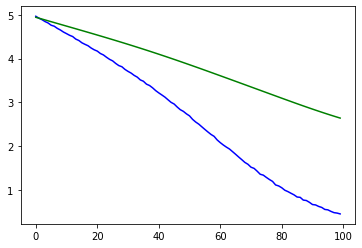

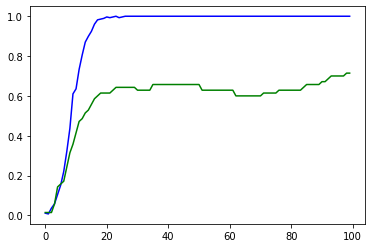

In [93]:
#-------------------------------------------------------------------#
# Gráfico do Erro:
plt.figure()
plt.plot(hist.history['loss'], 'b')
plt.plot(hist.history['val_loss'], 'g')
plt.show()
#-------------------------------------------------------------------#
# Gráfico da Acurácia:
plt.figure()
plt.plot(hist.history['accuracy'], 'b')
plt.plot(hist.history['val_accuracy'], 'g')
plt.show()
#-------------------------------------------------------------------#

### Prevendo Similaridades --> Cosine Similarities:

In [94]:
a = encoder.predict(X)
w2v = {}
alpha = 0.9

for i in range(X.shape[0]):

    try:
        old_vec = w2v[vocabulary[y[i].argmax()]]
        new_vec = alpha*old_vec + (1-alpha)*a[i] # Running Average
        w2v[vocabulary[y[i].argmax()]] = new_vec

    except:
        w2v[vocabulary[y[i].argmax()]] = a[i]

print (len(w2v.keys()))

141


In [95]:
def cosine_similarity(v1, v2):
    return np.dot(v1, v2)/np.sqrt((v1**2).sum()*(v2**2).sum())

v1 = w2v['tempus']
v2 = w2v['ultrices']

print(cosine_similarity(v1, v2))

0.16817178


In [102]:

matrix = pd.DataFrame(w2v, columns=w2v.keys())
matrix['Palavra'] = data_processed[:300]

In [100]:
matrix

,risus,ex,posuere,ante,at,condimentum,vestibulum,nunc,proin,dapibus,...,elementum,ligula,nulla,facilisi,venenatis,est,auctor,accumsan,consequat,Palavra
0,-0.217701,-0.159472,-0.250682,-0.205301,0.052902,0.149924,-0.122299,0.031278,-0.187790,0.109891,...,0.046554,-0.060522,-0.068479,0.103068,-0.124483,-0.042701,-0.102535,-0.116946,-0.090302,fusce
1,0.080065,-0.219400,0.097379,0.198382,-0.120515,-0.277028,0.220183,-0.015249,0.107477,-0.152376,...,-0.221892,-0.047072,-0.075878,-0.150789,-0.076866,0.029445,-0.150226,0.112174,0.030505,risus
2,0.007903,0.214448,-0.035499,0.304467,-0.182306,0.289113,-0.068165,0.323386,-0.078212,0.202903,...,0.176725,0.157032,0.055280,0.141677,-0.072056,0.147388,0.137222,0.179712,0.112323,ex
3,-0.031549,-0.062066,0.155259,-0.049042,-0.204496,0.200769,0.038880,0.192922,0.097672,0.110132,...,-0.098756,-0.031380,0.053736,-0.094499,-0.067921,-0.004354,0.021669,-0.113992,-0.021905,posuere
4,-0.120359,-0.026617,-0.244318,-0.223593,0.052878,0.145789,-0.035685,-0.169227,-0.043155,0.204876,...,-0.076213,-0.142274,-0.039122,-0.082780,0.074759,-0.097207,-0.158709,0.032073,-0.248815,ante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.222407,-0.077976,-0.047438,0.304928,0.126895,-0.148688,0.228169,-0.136961,0.178631,-0.159565,...,0.234887,0.070960,0.228182,0.007013,0.023841,0.064362,0.217623,0.040580,-0.110914,dictum
296,-0.252468,0.238267,0.267248,0.255549,0.235776,0.336945,0.324843,0.171410,-0.090244,0.137644,...,-0.002314,-0.005279,0.137153,0.126048,0.128069,0.300786,0.042684,0.157886,0.039040,nisl
297,-0.072433,0.175060,0.274087,-0.015439,0.204228,0.090292,0.203240,0.123719,0.235701,0.231166,...,-0.011741,0.039705,-0.093394,0.065032,0.025788,0.106675,-0.135897,-0.115910,0.118365,ac
298,0.061475,0.020652,0.226420,0.353305,-0.166236,0.173138,-0.055716,0.320926,0.172914,0.146220,...,-0.116439,0.115180,-0.022259,-0.017991,0.032119,-0.047204,0.091187,-0.084058,0.024632,laoreet
